## 1. Install Dependencies and Setup

In [358]:
!pip install tensorflow opencv-python matplotlib

In [360]:
!pip list

Package                           Version
--------------------------------- ------------------
absl-py                           2.1.0
aext-assistant                    4.0.15
aext-assistant-server             4.0.15
aext-core                         4.0.15
aext-core-server                  4.0.15
aext-panels                       4.0.15
aext-panels-server                4.0.15
aext-share-notebook               4.0.15
aext-share-notebook-server        4.0.15
aext-shared                       4.0.15
aiobotocore                       2.12.3
aiohttp                           3.9.5
aioitertools                      0.7.1
aiosignal                         1.2.0
alabaster                         0.7.16
altair                            5.0.1
anaconda-anon-usage               0.4.4
anaconda-catalogs                 0.2.0
anaconda-client                   1.12.3
anaconda-cloud-auth               0.5.1
anaconda-navigator                2.6.0
anaconda-project                  0.11.1
annotated-ty

In [362]:
import tensorflow as tf
import os

In [364]:
os.path.join('data','happy')

'data/happy'

In [368]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [370]:
tf.config.list_physical_devices('GPU')

[]

## 2. Remove dodgy images

In [373]:
import cv2
import imghdr
from matplotlib import pyplot as plt

In [375]:
data_dir = 'data' 

In [377]:
os.listdir(os.path.join(data_dir, 'happy'))

['happy-people_1463241208.jpg',
 'How_Happy_Are_People_at_Work.jpg',
 'MV5BMTM3ODM0NTQ1MF5BMl5BanBnXkFtZTcwMzAxMTM5OA._V1_.jpg',
 'images12.jpg',
 'images36.jpg',
 'jumping_for_joy_for_3_kinds_of_happy_people.jpg',
 'young-and-happy-people-vector-15114154.jpg',
 '1-2.jpg',
 'brady-bunch-3.jpg',
 'bigstock-Portrait-Of-Smiling-Employees-272904928-min-scaled.jpg',
 'images22.jpg',
 '_happy_jumping_on_beach-40815.jpg',
 'web3-happy-people-outside-smile-sun-nature-eduardo-dutra-620857-unsplash.jpg',
 'happinessa.jpg',
 'hdptcar-fi-2.jpg',
 'images17.jpg',
 'getty_152414899_97046097045006_68075.jpg',
 'happy-people-1024x768.jpeg',
 'habits-that-define-very-happy-people.jpg',
 'getty_494581822_130796.jpg',
 '1000_F_42220133_toAU6USGY9jVr2XJFLssfG00cSYIJ173.jpg',
 'images31.jpg',
 '05-12-21-happy-people.jpg',
 '1HEoLBLidT2u4mhJ0oiDgig.png',
 'images30.jpg',
 'happy-people-14410042.jpg',
 'Travis-Bradberry-Happy.jpg',
 '1920px-face-smile.svg_.png.jpg',
 'Screen-Shot-2012-10-23-at-12.57.22-PM.pn

In [379]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [381]:
img = cv2.imread(os.path.join('data','happy','images22.jpg'))

In [383]:
img.shape

(183, 275, 3)

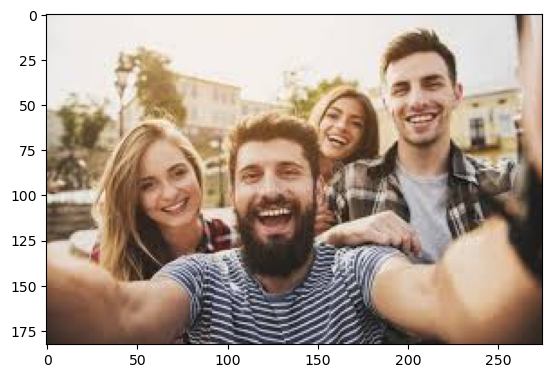

In [385]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [388]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

## 3. Load Data

In [391]:
import numpy as np
from matplotlib import pyplot as plt

In [393]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 169 files belonging to 2 classes.


In [395]:
data_iterator = data.as_numpy_iterator()


In [397]:
# Get another batch from the iterator
batch = data_iterator.next()

In [399]:
# Images represented as numpy arrays
batch[0].shape

(32, 256, 256, 3)

In [401]:
# Class 1 = SAD PPL
# Class 0 = HAPPY PPL
batch[1]

array([0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1], dtype=int32)

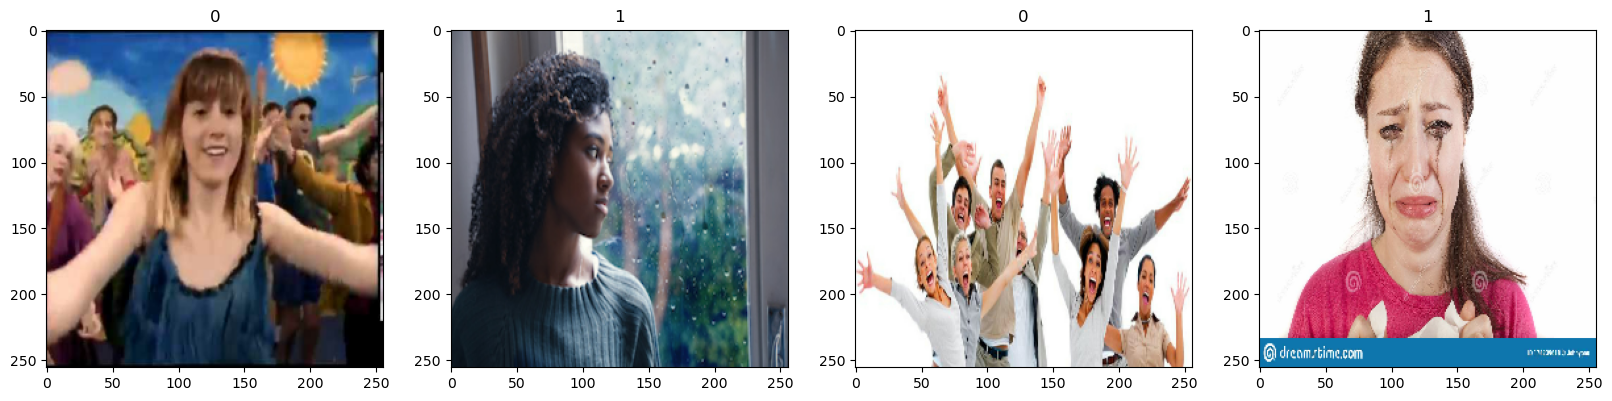

In [403]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])


## 4. Scale Data

In [406]:
data = data.map(lambda x,y: (x/255, y))

In [408]:
data.as_numpy_iterator().next()

(array([[[[0.9633986 , 0.97057015, 0.9279666 ],
          [0.9032169 , 0.89738846, 0.8344357 ],
          [0.9084436 , 0.92212313, 0.8446982 ],
          ...,
          [0.74148434, 0.8252252 , 0.424375  ],
          [0.74702054, 0.7391774 , 0.68317276],
          [0.7635748 , 0.7945953 , 0.6210273 ]],
 
         [[0.9912684 , 0.99215686, 0.98164827],
          [0.86848956, 0.8763327 , 0.72451836],
          [0.9773546 , 0.9432415 , 0.94987   ],
          ...,
          [0.7404182 , 0.8060126 , 0.6893887 ],
          [0.71641886, 0.75265014, 0.7070524 ],
          [0.7578732 , 0.80209863, 0.75366086]],
 
         [[0.99196076, 0.99588233, 0.9760784 ],
          [0.9209897 , 0.94153196, 0.8370038 ],
          [0.9638331 , 0.9619873 , 0.9157865 ],
          ...,
          [0.8289981 , 0.82450217, 0.8571386 ],
          [0.764038  , 0.790475  , 0.78025895],
          [0.8587776 , 0.8503921 , 0.8542555 ]],
 
         ...,
 
         [[0.467765  , 0.56910235, 0.38170955],
          [0.33577

## 5. Split Data

In [411]:
train_size = int(len(data)*.60)
val_size = int(len(data)*.20)
test_size = int(len(data)*.20)

In [413]:
train_size+val_size+test_size

5

In [415]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [417]:
len(test)

1

## 6. Build Deep Learning Model

In [420]:
train


<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [422]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [424]:
model = Sequential()

In [426]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())


model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())


model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [428]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [430]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

## 7. Train

In [433]:
logdir='logs'

In [435]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [437]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 353ms/step - accuracy: 0.5326 - loss: 1.1630 - val_accuracy: 0.5000 - val_loss: 1.4072
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 318ms/step - accuracy: 0.3477 - loss: 1.4574 - val_accuracy: 0.6250 - val_loss: 0.6385
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 359ms/step - accuracy: 0.6523 - loss: 0.6179 - val_accuracy: 0.6875 - val_loss: 0.5639
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 333ms/step - accuracy: 0.6094 - loss: 0.6213 - val_accuracy: 0.7188 - val_loss: 0.5369
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 313ms/step - accuracy: 0.6497 - loss: 0.5852 - val_accuracy: 0.5938 - val_loss: 0.5786
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 315ms/step - accuracy: 0.6914 - loss: 0.5827 - val_accuracy: 0.6875 - val_loss: 0.5399
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 365ms/step - accuracy: 0.6602 - loss: 0.5189 - val_accuracy: 0.5625 - val_loss: 0.6305
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 327ms/step - accuracy: 0.6836 - loss: 0.5638 - val_accuracy: 0.7812 - val_loss:

## 8. Plot Performance

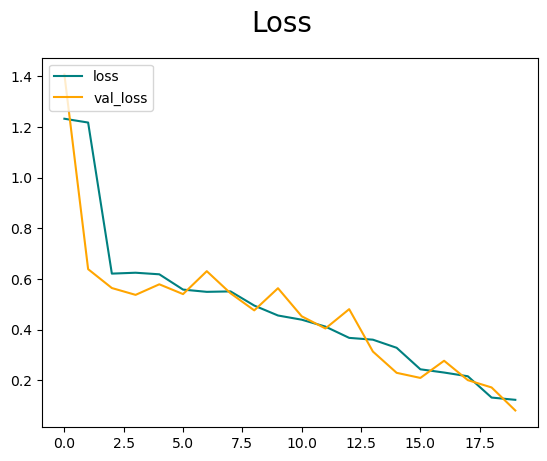

In [440]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

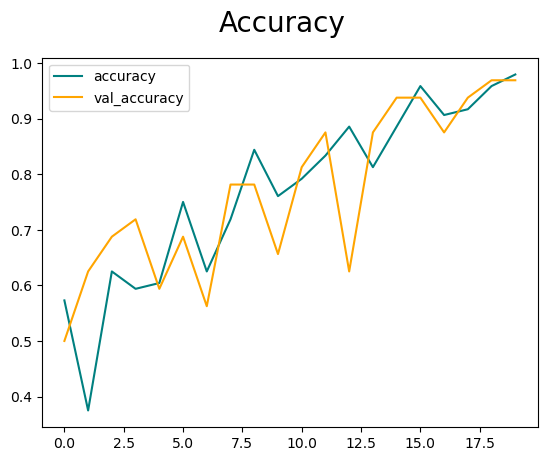

In [442]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

## 9. Evaluate

In [445]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [447]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [449]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


In [451]:
print(f'Precision{pre.result().numpy()}, Recall:{ re.result().numpy()}, Accuracy:{ acc.result().numpy()}')

Precision0.9166666865348816, Recall:1.0, Accuracy:0.96875


## 10. Test

In [302]:
import cv2

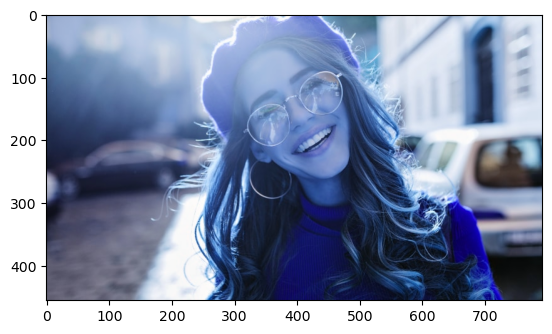

In [455]:
img = cv2.imread('happyTest.jpg')
plt.imshow(img)
plt.show()

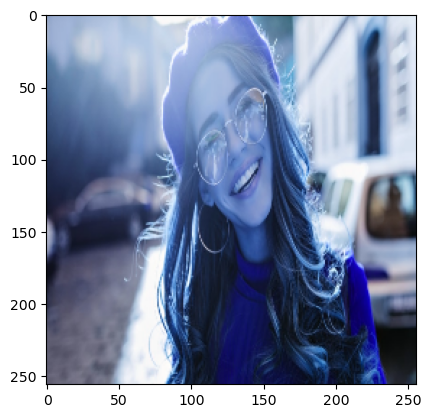

In [457]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [459]:
yhat = model.predict(np.expand_dims(resize/255, 0))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


In [461]:
yhat


array([[0.2659491]], dtype=float32)

In [463]:
# Binary Classification

if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Happy


## 11. Save the Model

In [466]:
from tensorflow.keras.models import load_model

In [480]:
model.save(os.path.join('saveModel','imageclassifier.h5'))

In [482]:
new_model = load_model(os.path.join('saveModel','imageclassifier.h5'))

In [486]:
yhatnew = new_model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


In [488]:

if yhatnew > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Happy
